In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance)

def my_pca(X):
    # Step1: Data centralisation
    # 1.1 get the "mean matrix"
    # Take the mean of all columns on each row, because the columns are data point.
    m = np.mean(X, axis=1)
    # we need to reshape m
    m = m.reshape(m.shape[0], 1)
    
    # 1.2 Data centralisation
    X_hat = X - m
    
    # Step2: Eigen analysis
    # 2.1 Calculate the covariance matrix
    cov_mat = np.mat(np.cov(X_hat, rowvar=True))
    
    # 2.2 Find out all eigenvalues
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    
    # 2.3 Sort all eigenvalues
    # Get the index of the feature vectors sorted from largest to smallest
    sorted_idx = np.argsort(-eig_val)
    sorted_eig_val = eig_val[sorted_idx]
    # data are organised in the column vector notation, so we need to sort the columns.
    sorted_eig_vec = eig_vec[:, sorted_idx]

    return sorted_eig_val, sorted_eig_vec

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)

def my_dual_pca(X):
    # Step1: Data centralisation
    # 1.1 get the "mean matrix"
    # Take the mean of all columns on each row, because the columns are data point.
    m = np.mean(X, axis=1)
    m = m.reshape(m.shape[0], 1)
    
    # 1.2 Data centralisation
    X_hat = X - m
    
    # Step2: SVD solution to eigen analysis
    # 2.1 calculate Y, Y = X_hat.T / np.sqrt(N-1), because by doing this V will be the eigenvector and eigenvalue is the square of sigma.
    N = X.shape[1]
    # !!!!!if I use Y = 1 / np.sqrt(N-1) * X_hat.T, the answer will be different!!
    Y = X_hat.T / np.sqrt(N-1)  
    
    # 2.2 SVD
    # columns stand for instance
    U,sigma,VT = np.linalg.svd(Y)
    V = VT.T
    
    # The eigenvalue is the square of sigma, V is eigenvector.
    return sigma ** 2, V

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [5]:
# Import dataset
iris = datasets.load_iris()
X = iris.data.T
print(iris.data.shape)
y = iris.target

(150, 4)


In [6]:
# Visualisation
# use my_PCA to get the sorted eigenvalues and the vectors.
sorted_eig_val, sorted_eig_vec = my_pca(X)

# Select top p (p < d) eigenvectors of S to be principal components to form the projection matrix
# In this assignment p = 2.
p = 2
P = sorted_eig_vec[:,:p]
P_mat = np.mat(P)
    
# encoding: generate a low-dimensional representation of data point

# Data centralisation
# get the "mean matrix"
m = np.mean(X, axis=1)
m = m.reshape(m.shape[0], 1)
X_hat = X - m
encoding_X = np.dot(P_mat.T, X_hat)
print('Encoding shape:')
print(encoding_X.shape)

Encoding shape:
(2, 150)


PC1, PC2, PC3 is the first 3 vector in eigenvectors. We can store the projection on each PC in the matrix, and then take the first 1, 2, and 3 rows for visualization.

In [7]:
# I encoding the matrix in all dimension for convenience
encoding_all_X = np.dot(sorted_eig_vec.T, X_hat)

# According to the discretion of this Assignment, the first row is PC1, the second row is PC2 and so on.
# And we can get the projection on PC1, PC2 and PC3.
p_PC1 = encoding_all_X[0]
p_PC2 = encoding_all_X[1]
p_PC3 = encoding_all_X[2]

print('The shape of matrix that encoding in all dimension:')
print(encoding_all_X.shape)

The shape of matrix that encoding in all dimension:
(4, 150)


### Visualisation (The anwser to the question a)

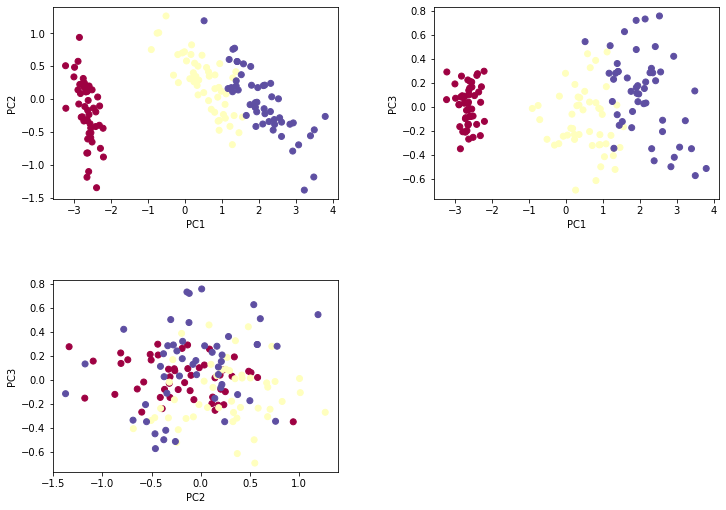

In [8]:
fig = plt.figure(figsize=(10,7))  

# plot figure 1
ax1 = fig.add_subplot(2,2,1) 
plt.xlabel('PC1')
plt.ylabel('PC2')
# we can use cmap=plt.cm.Spectral to let the data of different labels have different colors.
ax1.scatter(np.array(p_PC1), np.array(p_PC2),c=iris.target,cmap=plt.cm.Spectral) 

# plot figure 2
ax2 = fig.add_subplot(2,2,2)  
plt.xlabel('PC1')
plt.ylabel('PC3')
ax2.scatter(np.array(p_PC1), np.array(p_PC3),c=iris.target,cmap=plt.cm.Spectral) 

# plot figure 3
ax3 = fig.add_subplot(2,2,3)  
plt.xlabel('PC2')
plt.ylabel('PC3')
ax3.scatter(np.array(p_PC2), np.array(p_PC3),c=iris.target,cmap=plt.cm.Spectral) 

plt.tight_layout(pad=0.4,h_pad=5.0,w_pad=5.0) 

### Describe  (The anwser to the question b)

It can be seen that the range of PCs is PC1 > PC2 > PC3, which is because the variances of the projections on the first three eigenvectors are PC1 > PC2 >PC3.

In the PC1-PC2 graph, the three types of data with different labels are clearly separated, and each type of data is very concentrated. The shape of the data is also similar to a bar, one side is longer, and the other side is shorter. Project the points on PC1 and PC2 to get the main information of the data.

In PC1-PC3 graph, the three types of data are relatively divided. The boundary between the yellow and blue points is not as clear as the first picture, and the data has obviously become sparse. The shape of the data becomes irregular, and one side is still longer. This shows that we can also get some information from it, and the effect is better than PC2-PC3.


In PC2-PC3 graph, the three types of data are mixed. The boundary between the yellow and blue points is not as clear as the first picture, and the data has obviously become sparse. The shape of The boundaries of the three types of data are completely invisible, and the data distribution is very scattered. It looks chaotic. This shows that it is difficult for us to extract key information from it.

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

In [9]:
X, _ = np.load('./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]

### The anwser to the question a

For this assignment, I use PoV(Proportion of Variance) method to get the right dimension.

The function of PoV is:
$$ PoV(k) = \frac{\sum_{i=1}^k{\lambda_i}}{\sum_{i=1}^d{\lambda_i}}$$
where $d$ is the number of all dimensions and $k$ is the number of dimensions after dimensionality reduction, that is, the number of principal components.

We can set a value for PoV to find the k we need. Here we use 90% as the default value.

In [10]:
def my_PoV(eig_val, ratio=0.9):
    # p stands for the dimension
    p = 0 
    # tot_p_eig_val represents the sum of the first p eigenvalues
    tot_p_eig_val = 0 
    tot_eig_val = sum(eig_val)

    for val in eig_val:
        tot_p_eig_val += val
        p += 1
        if (tot_p_eig_val / tot_eig_val) >= ratio:
            return p
    return p

In [11]:
# Image compression
# Use dual PCA to compress the image.
SVD_eig_val, SVD_eig_vec = my_dual_pca(train_X) 

# get the k
k = my_PoV(SVD_eig_val)
print('k is:')
print(k)

k is:
33


### The anwser to the question b

Therefore, k should be 33, that is, **the number of  of principal components** is 33.

Then, display the k eigenface images.

### The anwser to the question c

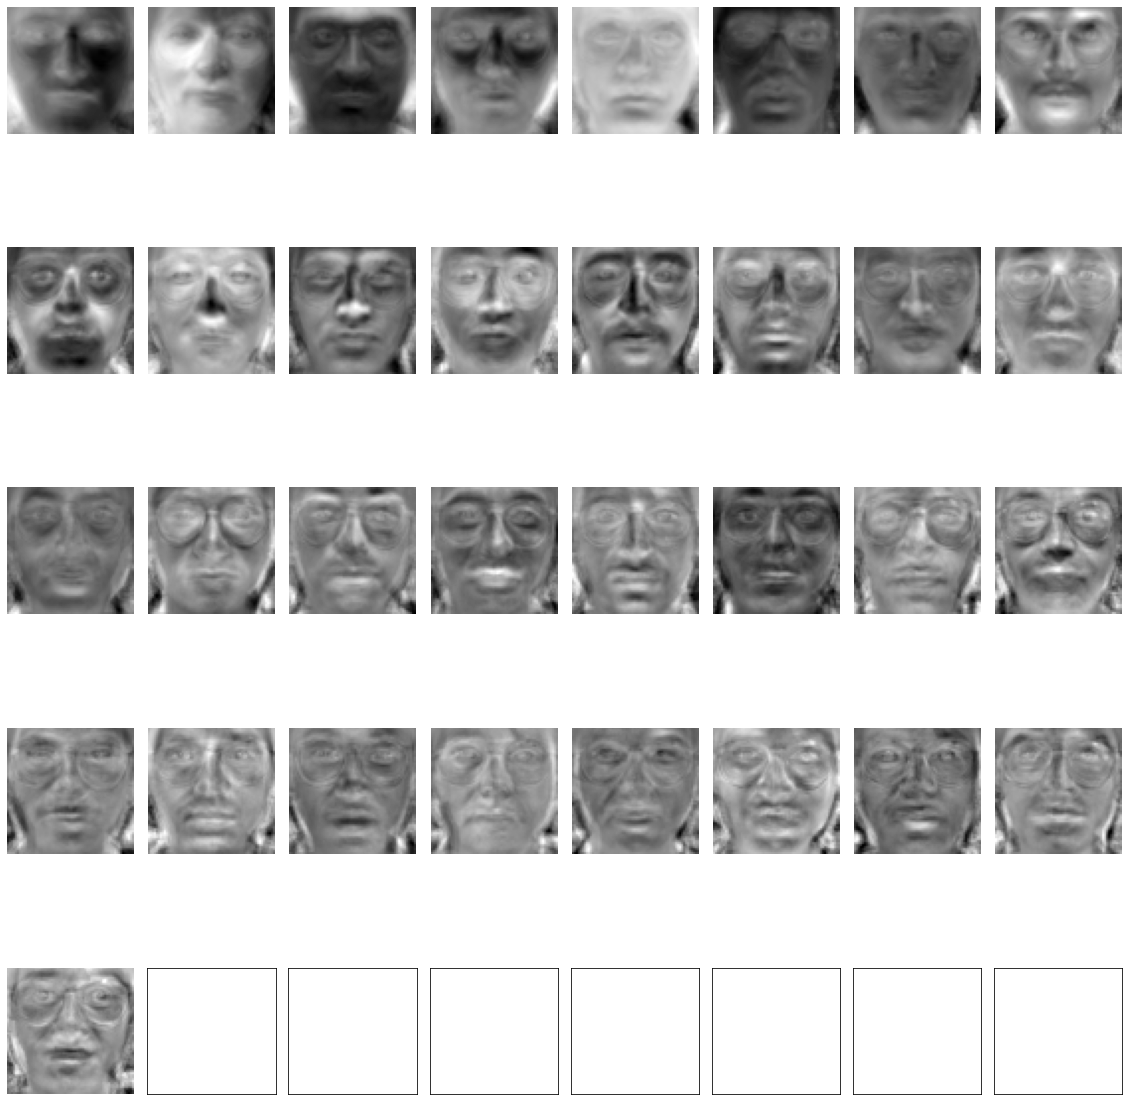

In [12]:
fig, ax = plt.subplots(int(k/8) + 1, 8, subplot_kw = {'xticks':[],'yticks':[]}, figsize=(20,20), gridspec_kw=dict(hspace=0.9,wspace=0.1))
for i, axi in enumerate(ax.flat):
    if i == k: 
        break
    # we should use columns here, because columns stand for PCs.
    print_image(axi, SVD_eig_vec[:, i])

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

#### list all the low-dimensional representations of all the test images in a table in k×15 format.

In [13]:
# Data centralisation
# get the "mean matrix" for train set.
m = np.mean(train_X, axis=1)
m = m.reshape(m.shape[0], 1)
# centralise data
test_X_hat = test_X - m

# encoding 
encoding_test_X = np.dot(SVD_eig_vec[:k], test_X_hat) 

### The anwser to the question a

In [14]:
print('low-dimensional representations of all test images:')
print(encoding_test_X)

low-dimensional representations of all test images:
[[-1.53998480e+03 -1.45394726e+03  1.83455052e+02 -2.11813124e+02
  -3.45117771e+02 -2.26339741e+03  1.39753195e+03 -7.01423195e+02
  -1.25385643e+03 -2.57666784e+02 -8.71583089e+02 -1.48145173e+03
   1.19134154e+03 -3.34441497e+02  9.35538306e+02]
 [ 1.10808157e+03  8.43744147e+02  3.50249885e+02 -1.57655217e+02
   8.40241566e+01  1.48915623e+03 -1.24168666e+03  3.50240610e+02
   6.20469866e+02  2.72265701e+02  7.22790773e+02  5.67181078e+02
  -8.97600601e+02  2.97741847e+02 -6.84788954e+02]
 [-4.91077350e+02 -7.34806453e+02  2.21777152e+02 -5.30083829e+02
  -2.60857575e+02 -8.48256797e+02  4.91742223e+02 -4.46186977e+02
  -7.54673571e+02  2.26847092e+01 -3.62168083e+02 -3.76867292e+02
  -2.79099363e+02 -5.85289354e+02 -2.64001692e+02]
 [ 2.79353857e+02 -5.05259587e+02  5.12558179e+02 -1.10409284e+02
   4.20898580e+02 -2.00642950e+01  1.09136263e+02  4.18659191e+01
  -2.90311936e+02  4.65732046e+02  1.80845718e+02  2.18564026e+02
  -

#### display all the reconstructed test images by using the provided print_image function and arranging 15 test images in a 3 × 5 grid;

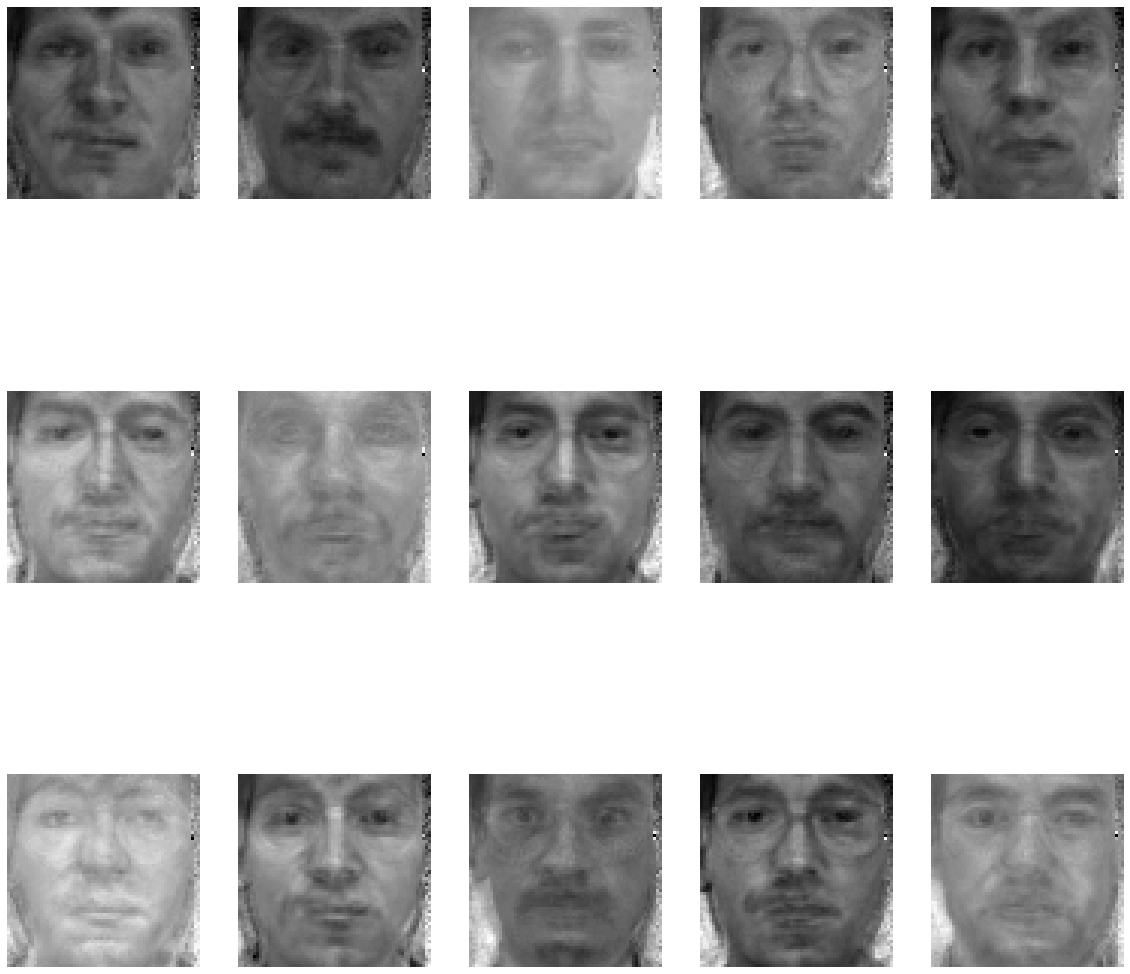

In [15]:
# decoding
decoding_test_X = np.mat(m + np.dot(SVD_eig_vec[:k].T, encoding_test_X))

# print the image
fig_test, ax_test= plt.subplots(3, 5, subplot_kw = {'xticks':[],'yticks':[]}, figsize=(20,20))
for i, axi in enumerate(ax_test.flat):
    if i == 15: 
        break
    print_image(axi, decoding_test_X[:, i])

#### Describe a proper evaluation criterion for measuring the loss between an original raw and its corresponding reconstructed images

I choose L2 as the loss function, and use this loss function as an evaluation criterion.
$$ L_2(\hat{y}, y) = \sum_{i=1}^n(y^{(i)} - \hat{y}^{(i)}) $$
In this assignment, each image corresponds to each column of the matrix. 
1. Calculate the difference between test_X and decoding_test_X to get the new matrix loss.
2. Square each item in the loss matrix to get a new loss matrix.
3. Sum each column of the loss matrix.

#### Program the evaluation criterion

In [16]:
# create a L2 funcation
def L2(X, decoding_X):
    loss = np.sum(np.power((decoding_X - X), 2), axis=0)
    return loss

#### Get the loss for each images.

In [17]:
# pictures_losses are used to store the loss of each Image.
pictures_losses = L2(test_X, decoding_test_X)
print(pictures_losses.shape)
for i in range(15):
    print('The ' + str(i+1) + "th image's loss is:" + str(np.array(pictures_losses)[:,i][0]))

(1, 15)
The 1th image's loss is:2944517.5731969518
The 2th image's loss is:4360643.451808877
The 3th image's loss is:1934087.7412643773
The 4th image's loss is:2923395.348458081
The 5th image's loss is:1934074.4110720695
The 6th image's loss is:5949857.964642015
The 7th image's loss is:4519877.475698943
The 8th image's loss is:4932770.072119448
The 9th image's loss is:5399325.848146526
The 10th image's loss is:3385028.4879630934
The 11th image's loss is:8758852.021723574
The 12th image's loss is:4922990.059347647
The 13th image's loss is:5572231.741347574
The 14th image's loss is:3253728.5615206575
The 15th image's loss is:2538365.18643316


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [18]:
train_X, train_y, test_X, test_y = np.load('./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

To create learning_with_PCA, which is the method with PCA, we need:
1. Compress train_X
2. training with SVM
3. Compress test_X
4. Predict y
5. Calculate accuracy and confusion matrix

In this Assignment, the 'm', which is the mean matrix that is same as what we got in Part3(A4 and A5).

In [19]:
def learning_with_PCA(train_X, test_X, train_y, test_y):
    from sklearn.pipeline import make_pipeline
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    # Step1: Compress train_X
    # 1.1 Data centralisation
    # 1.1.1 Get the "mean matrix"
    # It is m in Assignment 4.
   
    # 1.1.2 Make data centralised, m is what we calculated in A5.
    train_X_hat = train_X - m
    
    # 1.2 Encoding train data
    # In sklearn rows stand for data point, so I transposed it.
    encoding_train_X = np.dot(SVD_eig_vec[:k], train_X_hat)
   
    # Step2: training with SVM (with 'RBF' kernel)
    clf = make_pipeline(SVC(kernel='rbf'))
    clf.fit(encoding_train_X.T, train_y)
    # we can also use clf = SVC(kernel='rbf').fit(encoding_train_X.T, train_y) here
    
    # Step3: Compress train_X
    # 3.1 Data centralisation
    # 3.1.1 Get the "mean matrix"
    # It is m in Assignment 4.
    
    # 3.1.2 Make data centralised.
    test_X_hat = test_X - m
    
    # 3.2 Encoding test data
    # In sklearn rows stand for data point, so I transposed it.
    encoding_test_X = np.dot(SVD_eig_vec[:k], test_X_hat)
    
    # Step4: Predict y
    # Make predictions on the test set
    y_pred = clf.predict(encoding_test_X.T)

    # Step 5: Calculate accuracy and confusion matrix
    print('The classification assessment is as follows:')
    print(classification_report(test_y, y_pred))
    print('The accuracy is:')
    print(accuracy_score(test_y, y_pred))
    print('The confusion matrix is:')
    print(confusion_matrix(test_y, y_pred))


To create learning_without_PCA, which is the method without PCA, we need:
1. training with SVM(Use raw data)
2. Predict y
3. Calculate accuracy and confusion matrix

In [20]:
def learning_without_PCA(train_X, test_X, train_y, test_y):
    from sklearn.pipeline import make_pipeline
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    # Step1: training with SVM(with 'RBF' kernel)
    clf = make_pipeline(SVC(kernel='rbf'))
    # fit the model
    clf.fit(train_X.T, train_y)
    # we can also use clf = SVC(kernel='rbf').fit(train_X.T, train_y) here
    
    # Step2: Predict y
    # Make predictions on the test set
    y_pred = clf.predict(test_X.T)

    # Step 3: Calculate accuracy and confusion matrix
    print('The classification assessment is as follows:')
    print(classification_report(test_y, y_pred))
    print('The accuracy is:')
    print(accuracy_score(test_y, y_pred))
    print('The confusion matrix is:')
    print(confusion_matrix(test_y, y_pred))

In [21]:
# Comparison
print('learning with PCA')
learning_with_PCA(train_X, test_X, train_y, test_y)
print('\n')
print('learning without PCA')
learning_without_PCA(train_X, test_X, train_y, test_y)

learning with PCA
The classification assessment is as follows:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

The accuracy is:
0.8333333333333334
The confusion matrix is:
[[2 1]
 [0 3]]


learning without PCA
The classification assessment is as follows:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

The accuracy is:
0.8333333333333334
The confusion matrix is:
[[2 1]
 [0 3]]


When we use PCA to compress the data, the shape of the original data is (4096,16), because PCA compression is used, the shape of the data becomes (33,16), achieving dimensionality reduction. Here, 4096 is the number of features, and 16 is the number of instances. Because we have reduced the dimensionality during training, we should also reduce the dimensionality of our test data. So the dimension of the test data has changed from (4096, 6) to (33, 6)

It can be seen that the accuarcy in Compress_pipeline system(with PCA) is 0.83, while in Uncompress_pipeline system(without PCA) is 0.83.

Besides, the confusion matrix in the first system is:
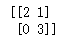
 
 The confusion matrix in the second system is:
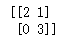

### <span style="color:red">=========== End of Assignment 6 ===========</span>